<a href="https://colab.research.google.com/github/fotojuanmoreno/DescubriendoML/blob/master/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos las librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos el archivo o db. Le indicamos que no tiene linea de cabecera.

In [ ]:
data = pd.read_csv("car.csv", header = None)

In [ ]:
mos los titulos de las columnas.

In [ ]:
data.columns = ["Price", "Maintenance Cost", "Number of Doors", "Capacity", "Size of Luggage Boot", "Safety", "Decision"]

Con head() vemos los 5 primeros valores de nuestro csv.

In [ ]:
data.head(5)

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


También podemos utilizar sample(), que nos dará una muerta aleatoria.

In [ ]:
data.sample(5)

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,Safety,Decision
770,high,low,2,4,med,high,acc
1628,low,low,2,2,big,high,unacc
1440,low,high,3,4,small,low,unacc
1322,low,vhigh,2,more,big,high,acc
78,vhigh,vhigh,4,more,big,low,unacc


O tail(), que nos muestra los 5 últimos resultados.

In [ ]:
data.tail(5)

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,Safety,Decision
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


La sigientre entrada de código nos devuelve el nuemero de filas y columnas que tiee nuestro archivo.

In [ ]:
data.shape

(1728, 7)

Si quisieramos ver el número totak de datos que contiene utilizaríamos .size: Que basicamente multilica las filas y las columnas.

In [ ]:
data.size

12096

Tambien podemos aplicar head, sample o tail a elementos o columnas concretas:

In [ ]:
data["Price"].head(5)

0    vhigh
1    vhigh
2    vhigh
3    vhigh
4    vhigh
Name: Price, dtype: object

Podemos pedirle que de la columna Price, nos puestre los tres primero valores:

In [ ]:
data["Price"][:3]

0    vhigh
1    vhigh
2    vhigh
Name: Price, dtype: object

O agrupar varias columnas:

In [ ]:
data[["Price", "Decision"]].tail()

,Price,Decision
1723,low,good
1724,low,vgood
1725,low,unacc
1726,low,good
1727,low,vgood


value_counts() es un método muy interesante que nos devuelve el total de los distintos registros que aparecen en nuestro db, sumados:

In [ ]:
decision = data["Decision"].value_counts()

In [ ]:
decision

unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64

Añadiendo sort_index podremos ordenarlo alfabeticamente o en orden descendente cambiando True por False.

In [ ]:
data["Decision"].value_counts().sort_index(ascending = True)

acc       384
good       69
unacc    1210
vgood      65
Name: Decision, dtype: int64

Ahora que nuestros datos ya están, más o menos, ordenados, podemos utilizar matplotlib para verlos de una manera más visual. El siguiente gráfico se nos muestra porque le hemos pedido al código que nos muestra una gáfica de tipo (kind) barras:

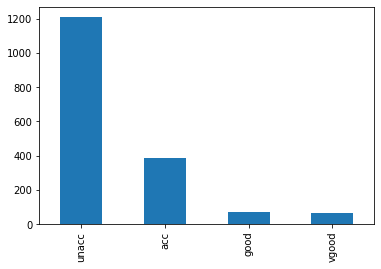

In [ ]:
decision.plot(kind = "bar")

unique nos muestra lo valores, sin repetir, que contiene una columna.

In [ ]:
data["Price"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

Es más fácil o habitual trabajar con números cuando se pueda. Así que cambiemos los valores de Price por valores numéricos:

In [ ]:
data["Price"].replace(('vhigh', 'high', 'med', 'low'), (4, 3, 2, 1), inplace = True)

In [ ]:
data["Price"].unique()

array([4, 3, 2, 1])

Vamos a hacer una gráfica, esta vez un poco más completa. Vamos a ver los distintos valores y cuantas veces aparecen estos en price y luego, haciendi una variable de esto, crearemos la gráfica. La primera linea es solo para especificar algunos colores que utilizaremos. La segunda, como antes, crea la gráfica. Esta vez le hemos aadido el vaor color para que utilice los colores que le hemos dado. Las siguientes lineas crean los nombres para los ejes x e y y la última el titulo:

In [ ]:
price = data["Price"].value_counts()

Text(0.5, 1.0, 'Precio de los coches')

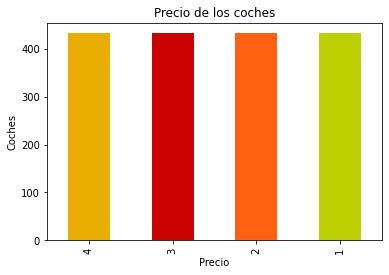

In [ ]:
colors = ["#EAAE01", "#CC0101", "#FF6011", "#BDD001"]
price.plot(kind = "bar", color = colors)
plt.xlabel("Precio")
plt.ylabel("Coches")
plt.title("Precio de los coches")

Vamos a hacer ahora un grafico de tarta:

Vamos a utilizar los datos de la columna Safety, y lo primero que vamos a hacer es ver que datos contiene esta:

In [ ]:
data["Safety"].value_counts()

low     576
high    576
med     576
Name: Safety, dtype: int64

Realizcemos unas variables que contengan: los nombre de los campos, los valores de estos, los colores que usaremos y los espacios que debe de haber entre los campos representados.

In [ ]:
labels = ['low', 'med', 'high']

In [ ]:
size = [576, 576, 576]
color = ["cyan", "green", "blue"]
explode = [0, 0.1, 0]

Ahora que ya lo tenemos generaremos nuestra gráfica. Le indicamos a matplotlib que será una grafica de tipo pie e introducimos los valores de las variables. El titulo, al que le hemos cambiado el tamaño, y le indicamos que no hay valores x e y que mostrar. colocamo nuestra leyenda y mostramos la gráfica:

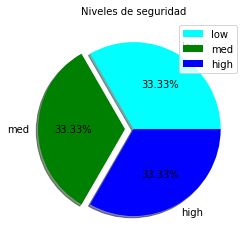

In [ ]:
plt.pie(size, labels = labels, colors = color, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title("Niveles de seguridad", fontsize = 10)
plt.axis("off")
plt.legend(loc = "best")
plt.show()